## ICCLIM C4I: Calculate the Averaged Temperature Anomaly 2081-2100 vs 1971-2000 SSP5


Example notebook that runs ICCLIM, which is pre-installed in the notebook.

The example calculates the averaged temperature anomaly (using the TG indicator) for the period 2081-2100 compared to the reference 1971-2000 for SSP585 and several climate models. It needs the tas parameter chosen by the user on C4I. Alternatively, it could also be used as an example for any other climate indice.

The data is read using xarray and a plot of the time series averaged over Europe is generated, as well as an average spatial map. Several output types examples are shown.

The datasets that are expected for this notebook are tas parameter (needed to calculate the TG indicator) for several climate models, for the historical (1971-2000) and ssp585 (2081-2100) experiments and for one member. Monthly data is much faster to process than using daily data. In C4I, you can find all of the data needed in the CMIP6 project, at the **esgf-data3.ceda.ac.uk** and **esgf3.dkrz.de** mirrors.

### Preparation of the needed modules

In [23]:
import icclim

import sys
import glob
import os
import datetime
import cftime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import nc_time_axis
import rioxarray
import cartopy.crs as ccrs

print("python: ",sys.version)
print("numpy: ", np.__version__)
print("xarray: ", xr.__version__)
print("pandas: ", pd.__version__)
print("icclim: ", icclim.__version__)

python:  3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 16:22:27) 
[GCC 9.3.0]
numpy:  1.20.2
xarray:  0.17.0
pandas:  1.2.4
icclim:  4.2.17


### Specification of the parameters and period of interest

The time period of interest as well as the reference period are defined here.
A list of models is listed here as an example.
Here we used Monthly data (Amon) but daily data could also be used.
The corresponding datafiles must have been selected by the user, containing both the studied and referenced periods.

icclim is then executed for both periods for each climate model separately.

In [26]:
# studied period
dt1 = datetime.datetime(2081,1,1)
dt2 = datetime.datetime(2100,12,16)

# reference period
dtr1 = datetime.datetime(1971,1,1)
dtr2 = datetime.datetime(2000,12,16)

models=['ACCESS-CM2','BCC-CSM2-MR','CMCC-ESM2','GFDL-ESM4','INM-CM5-0','MPI-ESM1-2-LR']
out_f={}
out_hist_f={}
files=[]
files_hist=[]
for model in models:
  print("Processing model: "+model)
  out_f[model] = 'su_icclim_'+model+'.nc'
  out_hist_f[model] = 'su_icclim_'+model+'_hist.nc'
  files.append('su_icclim_'+model+'.nc')
  files_hist.append('su_icclim_'+model+'_hist.nc')
  #tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_199001-200912.nc
  filenames_hist = glob.glob('./data/latest/tas_Amon_'+model+'_historical_*.nc')
  filenames = glob.glob('./data/latest/tas_Amon_'+model+'_ssp585_*.nc')

  icclim.indice(indice_name='TG', in_files=filenames, var_name='tas', slice_mode='year', time_range=[dt1, dt2], transfer_limit_Mbytes=200, out_file=out_f[model])
  icclim.indice(indice_name='TG', in_files=filenames_hist, var_name='tas', slice_mode='year', time_range=[dtr1, dtr2], transfer_limit_Mbytes=200, out_file=out_hist_f[model])

2021-05-10 13:38:59,450    ********************************************************************************************
2021-05-10 13:38:59,451    *                                                                                          *
2021-05-10 13:38:59,452    *          icclim                                                            V4.2.17       *
2021-05-10 13:38:59,453    *                                                                                          *
2021-05-10 13:38:59,454    *                                                                                          *
2021-05-10 13:38:59,454    *          Mon May 10 13:38:59 2021 GMT                                                    *
2021-05-10 13:38:59,455    *                                                                                          *
2021-05-10 13:38:59,455    *          BEGIN EXECUTION                                                                 *
2021-05-10 13:38:59,456    *            

Processing model: ACCESS-CM2


2021-05-10 13:38:59,681 Loading data...
2021-05-10 13:39:00,168    ********************************************************************************************
2021-05-10 13:39:00,169    *                                                                                          *
2021-05-10 13:39:00,170    *          icclim                                                            V4.2.17       *
2021-05-10 13:39:00,171    *                                                                                          *
2021-05-10 13:39:00,172    *                                                                                          *
2021-05-10 13:39:00,172    *          Mon May 10 13:39:00 2021 GMT                                                    *
2021-05-10 13:39:00,173    *                                                                                          *
2021-05-10 13:39:00,173    *          END EXECUTION                                                                   *


Processing model: BCC-CSM2-MR


2021-05-10 13:39:01,944    ********************************************************************************************
2021-05-10 13:39:01,944    *                                                                                          *
2021-05-10 13:39:01,947    *          icclim                                                            V4.2.17       *
2021-05-10 13:39:01,948    *                                                                                          *
2021-05-10 13:39:01,949    *                                                                                          *
2021-05-10 13:39:01,950    *          Mon May 10 13:39:01 2021 GMT                                                    *
2021-05-10 13:39:01,951    *                                                                                          *
2021-05-10 13:39:01,952    *          END EXECUTION                                                                   *
2021-05-10 13:39:01,953    *            

Processing model: CMCC-ESM2


2021-05-10 13:39:03,172 Loading data...
2021-05-10 13:39:03,802    ********************************************************************************************
2021-05-10 13:39:03,802    *                                                                                          *
2021-05-10 13:39:03,815    *          icclim                                                            V4.2.17       *
2021-05-10 13:39:03,815    *                                                                                          *
2021-05-10 13:39:03,816    *                                                                                          *
2021-05-10 13:39:03,816    *          Mon May 10 13:39:03 2021 GMT                                                    *
2021-05-10 13:39:03,817    *                                                                                          *
2021-05-10 13:39:03,818    *          END EXECUTION                                                                   *


Processing model: GFDL-ESM4


2021-05-10 13:39:06,029    ********************************************************************************************
2021-05-10 13:39:06,030    *                                                                                          *
2021-05-10 13:39:06,031    *          icclim                                                            V4.2.17       *
2021-05-10 13:39:06,032    *                                                                                          *
2021-05-10 13:39:06,033    *                                                                                          *
2021-05-10 13:39:06,033    *          Mon May 10 13:39:06 2021 GMT                                                    *
2021-05-10 13:39:06,034    *                                                                                          *
2021-05-10 13:39:06,034    *          END EXECUTION                                                                   *
2021-05-10 13:39:06,035    *            

Processing model: INM-CM5-0


2021-05-10 13:39:07,228 Loading data...
2021-05-10 13:39:07,636    ********************************************************************************************
2021-05-10 13:39:07,636    *                                                                                          *
2021-05-10 13:39:07,637    *          icclim                                                            V4.2.17       *
2021-05-10 13:39:07,638    *                                                                                          *
2021-05-10 13:39:07,639    *                                                                                          *
2021-05-10 13:39:07,639    *          Mon May 10 13:39:07 2021 GMT                                                    *
2021-05-10 13:39:07,640    *                                                                                          *
2021-05-10 13:39:07,640    *          END EXECUTION                                                                   *


Processing model: MPI-ESM1-2-LR


2021-05-10 13:39:08,635    ********************************************************************************************
2021-05-10 13:39:08,636    *                                                                                          *
2021-05-10 13:39:08,637    *          icclim                                                            V4.2.17       *
2021-05-10 13:39:08,637    *                                                                                          *
2021-05-10 13:39:08,638    *                                                                                          *
2021-05-10 13:39:08,638    *          Mon May 10 13:39:08 2021 GMT                                                    *
2021-05-10 13:39:08,639    *                                                                                          *
2021-05-10 13:39:08,640    *          END EXECUTION                                                                   *
2021-05-10 13:39:08,640    *            

### Data preparation

Here all data is loaded in 2 separate variables, one containing all the historical periods for all the models, and the same for the future time period.

An example is shown on how to select a specific data location. But this is not used.

In [27]:
# Open datasets
tg = []
tg_hist = []
ds = []
ds_hist = []
for model in models:
    dsl = xr.open_dataset(out_f[model], decode_times=False)
    dsl.rio.write_crs("epsg:4326", inplace=True)
    dsl['time'] = xr.decode_cf(dsl).time
    dsl = dsl.assign_coords({'model_id':model})
    tg.append(dsl['TG'])
    
    dshl = xr.open_dataset(out_hist_f[model], decode_times=False)
    dshl.rio.write_crs("epsg:4326", inplace=True)
    dshl['time'] = xr.decode_cf(dshl).time
    dshl = dshl.assign_coords({'model_id':model})
    tg_hist.append(dshl['TG'])

# For later - grab the crs of the data using rioxarray
climate_crs = tg[0].rio.crs

# Select a single x,y combination from the data
longitude = tg[0]["lon"].sel(lon=3.5, method='nearest').values
latitude = tg[0]["lat"].sel(lat=44.2, method='nearest').values

print("Long, Lat values:", longitude, latitude)

Long, Lat values: 2.8125 44.375


### Perform spacial average on all the geographical domain

In [28]:
# Average different grids
for ii in range(len(tg)):
    tg[ii] = tg[ii].sel(lat=[0., 90.],method='nearest').mean(dim=['lon','lat'])
for ii in range(len(tg_hist)):
    tg_hist[ii] = tg_hist[ii].sel(lat=[0., 90.],method='nearest').mean(dim=['lon','lat'])

### Define a function to align all different calendar types

In [29]:
# Define function to align different calendars using annual data
def to_360day_annual(da):
    '''Takes a DataArray. Change the 
    calendar to 360_day and precision to annual.'''
    val = da.copy()
    timev = []
    years = [int(val) for val in da.time.dt.strftime("%Y")]
    for itime in range(val.sizes['time']):
       timev.append(cftime.Datetime360Day(years[itime],1,16))

    time1 = xr.DataArray(data=timev, dims=["time"])
    time1.name = 'time'
    # We rename the time dimension and coordinate to time360 to make it clear it isn't 
    # the original time coordinate.
    val = val.rename({'time':'time360'})
    time1 = time1.rename({'time':'time360'})
    val = val.assign_coords({'time360':time1})
    return val

### Align calendars of all input data

In [30]:
# Convert all calendars to annual precision (we have configured icclim to output yearly data)

ll = [to_360day_annual(da) for da in tg]
ll_hist = [to_360day_annual(da) for da in tg_hist]

# Concatenate all models into one
full_tg = xr.concat(ll, 'model_id', join='outer')
full_tg_hist = xr.concat(ll_hist, 'model_id', join='outer')
full_tg_anomaly = full_tg - full_tg_hist.mean(dim='time360')

### Plot a multi-model time series for the future time period

Temperature for SSP585 of the period 2080-2100.

The multi-model average is shown in bold black line.

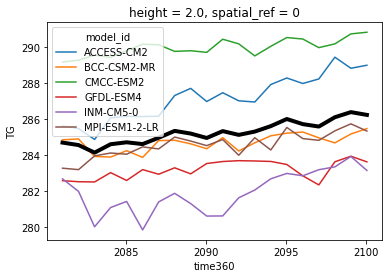

In [31]:
# Plot future time period and superimpose multi-model average in bold black line
full_tg.plot(hue='model_id')
full_tg.mean(dim='model_id').plot(color='black', linewidth=4)

### Plot a time series of the anomaly of temperature
Anomaly of temperature for SSP585 of the period 2080-2100 compared to 1971-2000.

The multi-model average is shown in bold black line.

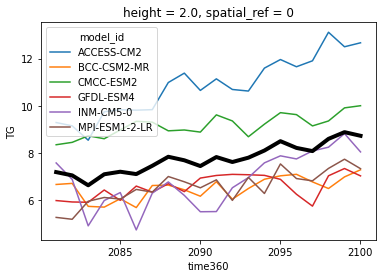

In [32]:
# Plot temperature anomaly compared to historical period and superimpose multi-model average in bold black line
full_tg_anomaly.plot(hue='model_id')
full_tg_anomaly.mean(dim='model_id').plot(color='black', linewidth=4)